In [1]:
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np
import pandas as pd
import talib
import seaborn as sns
from time import time
import pytz
import os

In [2]:
from modules import RiskManagement as RM
from modules import AccountManagement as AM

In [3]:
availabe_accounts = pd.read_csv('account_ids.txt',header=None)
print (availabe_accounts.values)

[['DU1440139']
 ['U2909804']]


In [4]:
account_number = availabe_accounts.values[0][0]

In [5]:
rth = False

In [6]:
if account_number == availabe_accounts.values[1][0]:

    optimal_weights_regularized = pd.read_csv('data/optimal_weights_regularized_sa.csv',index_col = 'asset')
    close = pd.read_csv('data/close_sa.csv', index_col = 'date')
    
elif account_number == availabe_accounts.values[0][0]:
    
    optimal_weights_regularized = pd.read_csv('output/optimal_weights_regularized.csv',index_col = 'asset')
    close = pd.read_csv('data/close.csv', index_col = 'date')

## Portfolio Reading

In [7]:
portfolio = AM.read_positions(subscribe = True, acctCode = account_number)

PositionEnd
Reading Portfolio


In [8]:
portfolio

,Position,marketPrice,marketValue,averageCost,unrealizedPNL,realizedPNL
Symbol,,,,,,
ACN,-3.0,229.479996,-688.44,242.648767,39.51,0.0
ADP,170.0,129.070007,21941.90,137.787056,-1481.90,0.0
AEP,94.0,79.300003,7454.20,79.176927,11.57,0.0
ALL,12.0,89.699997,1076.40,94.238192,-54.46,0.0
ATVI,101.0,80.400002,8120.40,83.106703,-273.38,0.0
BMRN,65.0,78.430000,5097.95,77.173489,81.67,0.0
CTSH,-182.0,67.269997,-12243.14,66.976469,-53.42,0.0
CTXS,15.0,133.210007,1998.15,143.606553,-155.95,0.0
DHR,-40.0,205.335007,-8213.40,205.547583,8.50,0.0


In [9]:
acc = AM.read_account(reqId = 0, subscribe = True, acctCode = account_number)

AccountDownloadEnd. Account: DU1440139
Reading Account


In [10]:
all_weights, long, short, grv = RM.portfolio_calculation(portfolio)

In [11]:
long_value = long['marketValue'].sum()
short_value = short['marketValue'].sum()
#print ('Buying Power: {} $'.format(np.round(float(acc.loc['BuyingPower',:].values[0]), 4)))
print ('Gross Market Value: {} $'.format(np.round(grv, 4)))
print (' Long Value: {} $'.format(np.round(long_value,4)))
print (' Short Value: {} $'.format(np.round(short_value,4)))
print (' Net Liquidation: {} $'.format(np.round(float(acc.loc['EquityWithLoanValue',:].values[0]),4)))
print (' Unrealize PNL: {} $'.format(np.round(portfolio['unrealizedPNL'].sum()),4))
print (' Loan Value: {} $'.format(np.round(float(acc.loc['GrossPositionValue'][0]) - float(acc.loc['EquityWithLoanValue'][0]), 4)))
print ('#####################################')
print ('Leverage Value: {}'.format(np.round(grv/float(acc.loc['EquityWithLoanValue'][0]), 4)))
print (' Long Leverage Value: {}'.format(np.round(long_value/float(acc.loc['EquityWithLoanValue'][0]), 4)))
print (' Short Leverage Value: {}'.format(np.round(np.abs(short_value)/float(acc.loc['EquityWithLoanValue'][0]), 4)))       

Gross Market Value: 221392.13 $
 Long Value: 111795.76 $
 Short Value: -109596.37 $
 Net Liquidation: 157543.0 $
 Unrealize PNL: 2308.0 $
 Loan Value: 63849.0 $
#####################################
Leverage Value: 1.4053
 Long Leverage Value: 0.7096
 Short Leverage Value: 0.6957


In [12]:
universe = portfolio.index
long_universe = long.index 
short_universe = short.index 

In [13]:
net_liq = np.round(float(acc.loc['EquityWithLoanValue',:].values[0]),4)

## Projected portfolio balance

In [14]:
target_leverage = 1.5
grv_target = net_liq * target_leverage
excess_grv = grv_target - grv
print (excess_grv,'$')
marketVal_target = all_weights * grv_target

14922.369999999995 $


In [15]:
balancing_order = marketVal_target['weights'] - portfolio['marketValue']
df_port = portfolio['marketPrice']
action_balance = pd.DataFrame(index = df_port.index, columns = ['shares'])
action_balance['shares'] = np.round(balancing_order / df_port,2)
to_drop = action_balance[action_balance['shares']==0.0].index
action_balance.drop(to_drop,axis=0,inplace=True)

In [16]:
grv_target

236314.5

In [17]:
val = AM.read_nextvalidid(reqId=-1)

NextValidId: 1585


## Filtering stocks with significant market value

In [18]:
df_c = pd.DataFrame(data=close[optimal_weights_regularized.index].iloc[-1].values,
                   index = close[optimal_weights_regularized.index].iloc[-1].index,
                   columns = ['close'])
df_c.index.name = 'asset'

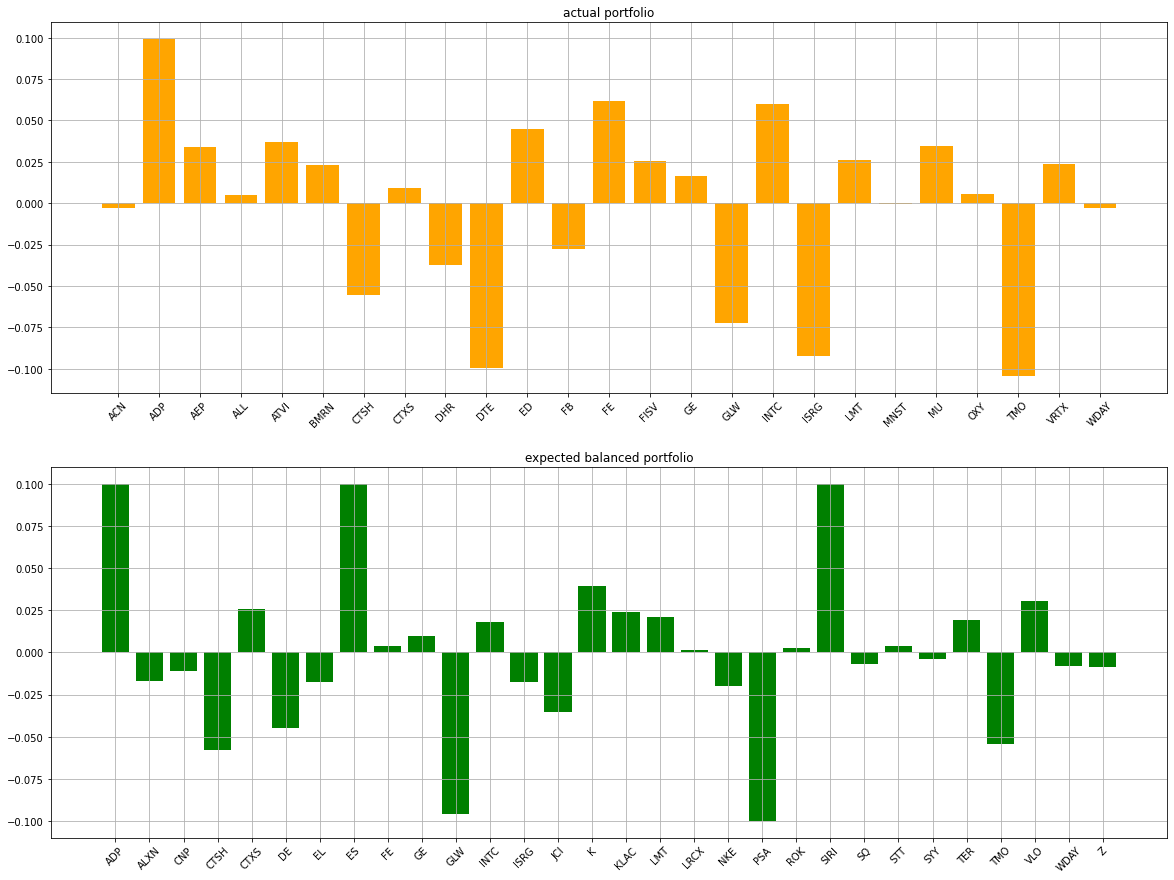

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

x1 = all_weights.index
y1 = all_weights.values.flatten()
axs[0].grid(True)
axs[0].bar(x1, y1, width = 0.8, linewidth = 1, color='orange')
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)
axs[0].set_title('actual portfolio')

x2 = optimal_weights_regularized.index
y2 = optimal_weights_regularized.values.flatten()
axs[1].grid(True,)
axs[1].bar(x2, y2, width = 0.8, linewidth = 1, color='green')
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)
axs[1].set_title('expected balanced portfolio')
plt.show()

## Processing data for execution

In [20]:
stock_to_balance = portfolio.index & optimal_weights_regularized.index
stock_to_close = portfolio.index ^ stock_to_balance

In [21]:
df_c_target = df_c.reindex(optimal_weights_regularized.index)
shares_target_float = (optimal_weights_regularized * grv_target)['optimal_weights']/df_c_target['close']

In [22]:
portfolio_shares_float = portfolio['marketValue'] / portfolio['marketPrice']

In [23]:
# Rebalance to optimal weights
action_final = pd.DataFrame(index = shares_target_float.index, columns = ['shares'])

for i in shares_target_float.index:
    
    if (i in stock_to_balance) and (i not in action_balance.index):
        action_final.loc[i,'shares'] = shares_target_float[i] - portfolio_shares_float[i]
        
    elif (i in stock_to_balance) and (i in action_balance.index):
        action_final.loc[i,'shares'] = shares_target_float[i] - (portfolio_shares_float[i] + action_balance['shares'][i])

    elif (i in action_balance.index) and (i not in stock_to_balance):
        action_final.loc[i,'shares'] = shares_target_float[i] + action_balance['shares'][i]
    else:
        action_final.loc[i,'shares'] = shares_target_float[i]

In [24]:
# rename columns
portfolio_shares_float = pd.DataFrame(portfolio_shares_float,columns = ['portfolio_shares'],index=portfolio_shares_float.index)
shares_target_float = pd.DataFrame(shares_target_float,columns = ['target_shares_not_balanced'],index=shares_target_float.index)

action_balance.columns = ['balance_lev_shares']
action_final.columns = ['final_action_shares']

In [25]:
# replacing too small actions value with nan value
treshold_long = 1
treshold_short = -1

action_final[(action_final['final_action_shares']>0) & (action_final['final_action_shares']< treshold_long)] = np.nan
action_final[(action_final['final_action_shares']<0) & (action_final['final_action_shares']> treshold_short)] = np.nan
action_final[action_final['final_action_shares']==0.0] = np.nan
action_final.dropna(axis=0,inplace=True)
action_final['final_action_shares'] = pd.to_numeric(action_final['final_action_shares'], errors='coerce')

In [26]:
action_conc = pd.concat([portfolio_shares_float,
                         action_balance,
                         shares_target_float,
                         action_final],axis=1)

In [27]:
isna_df = action_conc.isna()
for i in action_conc.index:
    if (isna_df.loc[i]['final_action_shares'] == True) & (isna_df.loc[i]['target_shares_not_balanced'] == False) :
        action_conc.drop(i, inplace = True)

In [28]:
action_conc.round(2)

,portfolio_shares,balance_lev_shares,target_shares_not_balanced,final_action_shares
ACN,-3.0,-0.19,NaN,NaN
ADP,170.0,11.44,183.59,2.15
AEP,94.0,6.43,NaN,NaN
ALL,12.0,0.91,NaN,NaN
ALXN,NaN,NaN,-35.38,-35.38
ATVI,101.0,6.87,NaN,NaN
BMRN,65.0,4.30,NaN,NaN
CNP,NaN,NaN,-136.04,-136.04
CTSH,-182.0,-12.26,-203.91,-9.65
CTXS,15.0,0.97,46.11,30.14


## Executing on TWS

In [29]:
op = AM.cancel_openorders()

open order ended


In [30]:
# closing positions not in shares target
if not stock_to_close.empty:
    next_order_id = AM.closing_positions(stock_to_close = stock_to_close,
                                              portfolio = portfolio , 
                                              order_id = val,
                                              ordersPriority = 'Patient',
                                              transmit = True)
else:
    print ('There is no stock to close...')
    next_order_id = val

app is running ...
closing 14 positions which are not present in action
closing position for ACN is: 3 
closing position for AEP is: 94 
closing position for ALL is: 12 
closing position for ATVI is: 101 
closing position for BMRN is: 65 
closing position for DHR is: 40 
closing position for DTE is: 197 
closing position for ED is: 136 
closing position for FB is: 25 
closing position for FISV is: 57 
closing position for MNST is: 1 
closing position for MU is: 155 
closing position for OXY is: 117 
closing position for VRTX is: 20 


In [31]:
action_final = action_final.astype('int')
AM.placing_final_orders(action_final=action_final, 
                             order_id = next_order_id,
                             ordersPriority = 'Patient',
                             transmit = True)

buy order quantity placed for ADP is: 2 
sell order quantity placed for ALXN is: 35 
sell order quantity placed for CNP is: 136 
sell order quantity placed for CTSH is: 9 
buy order quantity placed for CTXS is: 30 
sell order quantity placed for DE is: 49 
sell order quantity placed for EL is: 19 
buy order quantity placed for ES is: 301 
sell order quantity placed for FE is: 497 
sell order quantity placed for GE is: 245 
sell order quantity placed for GLW is: 180 
sell order quantity placed for INTC is: 200 
buy order quantity placed for ISRG is: 26 
sell order quantity placed for JCI is: 205 
buy order quantity placed for K is: 152 
buy order quantity placed for KLAC is: 31 
sell order quantity placed for LMT is: 3 
buy order quantity placed for LRCX is: 1 
sell order quantity placed for NKE is: 36 
sell order quantity placed for PSA is: 110 
buy order quantity placed for ROK is: 2 
buy order quantity placed for SIRI is: 4707 
sell order quantity placed for SQ is: 10 
buy order quan

In [32]:
if rth:
    print ('we are in regular trading hours...')
    open_orders_all = AM.get_openorders()
    if list(open_orders_all.values) == []:
        portfolio = AM.read_positions(subscribe = True, acctCode = account_number)
        not_executed = portfolio.index ^ action_final.index
        if list(not_executed)==[]:
            print ('all orders are executed')
        else:
            print ('some orders still not executed')
            print (not_executed)
    
else:
    print ('we are not in regular trading hours...')
    open_orders_all = AM.get_openorders()    
    not_executed = open_orders_all.index ^ action_conc.index
    
    if list(not_executed)==[]:
        print ('all orders are placed and ready to be executed...')
    
    else:
        print (list(not_executed))
        print ('The orders above are not placed. please check manually or retry to run the functions...')
    
    table = pd.concat([action_conc, open_orders_all[['open orders']]],axis=1)

we are not in regular trading hours...
open order ended
open order ended
all orders are placed and ready to be executed...


In [33]:
table

,portfolio_shares,balance_lev_shares,target_shares_not_balanced,final_action_shares,open orders
ACN,-3.000000,-0.19,NaN,NaN,3
ADP,169.999990,11.44,183.588010,2.148019,2
AEP,93.999996,6.43,NaN,NaN,94
ALL,12.000000,0.91,NaN,NaN,12
ALXN,NaN,NaN,-35.384515,-35.384515,35
ATVI,100.999998,6.87,NaN,NaN,101
BMRN,65.000000,4.30,NaN,NaN,65
CNP,NaN,NaN,-136.041070,-136.041070,136
CTSH,-182.000009,-12.26,-203.908256,-9.648246,9
CTXS,14.999999,0.97,46.106145,30.136146,30


## Commission report of last realized trades

In [34]:
com = AM.commission_report(acctCode = account_number, time= '')

In [35]:
com

,ticker,shares,action,price,marketValue,RealizedPNL,commission
time,,,,,,,


In [38]:
execution_date = com.index[-1]

IndexError: index -1 is out of bounds for axis 0 with size 0

In [42]:
RealizedPNL = np.round(pd.to_numeric(com.loc[slice(execution_date)]['RealizedPNL'], errors='coerce').sum(),2)
#Total_Realized_Return = np.round((RealizedPNL/net_liq)*100,2)
print ('Report for {}:'.format(execution_date.date()))
print (' Market Value: {} $'.format(np.round(com.loc[slice(execution_date)]['marketValue'].sum(),2)))
print (' Total Commission: {} $'.format(np.round(com.loc[slice(execution_date)]['commission'].sum(),2)))
print (' Total Realized PNL: {} $'.format(RealizedPNL))  
#print (' Total Realized Return: {} %'.format(Total_Realized_Return))  


Report for 2020-08-24:
 Market Value: 36684.4 $
 Total Commission: 47.15 $
 Total Realized PNL: 567.87 $


In [35]:
rootdir = 'data'
if account_number == availabe_accounts.values[0][0]:
    for subdir, dirs, files in os.walk(rootdir):
        for item in files:

            if item.endswith('.csv') and item.split('_')[0] == 'commission' and item.split('_')[1] == 'report.csv':
                
                print ('report file exist...')
                p = os.path.join('data/', item)
                report = pd.read_csv(p, index_col= 'date')
                report.loc[execution_date.date(),'market value'] = np.round(com.loc[slice(execution_date)]['marketValue'].sum(),2)
                report.loc[execution_date.date(),'total commission'] = np.round(com.loc[slice(execution_date)]['commission'].sum(),2)
                report.loc[execution_date.date(),'total realized pnl'] = RealizedPNL

            else:

                print ('creating report file...')
                report = pd.DataFrame(columns = ['market value','total commission','total realized pnl'], 
                              index = [execution_date.date()])
                report.index.name = 'date'
                report.loc[:,'market value'] = np.round(com.loc[slice(execution_date)]['marketValue'].sum(),2)
                report.loc[:,'total commission'] = np.round(com.loc[slice(execution_date)]['commission'].sum(),2)
                report.loc[:,'total realized pnl'] = RealizedPNL
    report.to_csv('data/commission_report.csv')
    com_rep = pd.read_csv('data/commission_report.csv', index_col= 'date')
    
elif account_number == availabe_accounts.values[1][0]:
    for subdir, dirs, files in os.walk(rootdir):
        for item in files:
            if item.endswith('.csv') and item.split('_')[0] == 'commission' and item.split('_')[1] == 'reportSA.csv' :
                print ('report file exist...')
                p = os.path.join('data/', item)
                report = pd.read_csv(p, index_col= 'date')
                report.loc[execution_date.date(),'market value'] = np.round(com.loc[slice(execution_date)]['marketValue'].sum(),2)
                report.loc[execution_date.date(),'total commission'] = np.round(com.loc[slice(execution_date)]['commission'].sum(),2)
                report.loc[execution_date.date(),'total realized pnl'] = RealizedPNL

            else:
                print ('creating report file...')
                report = pd.DataFrame(columns = ['market value','total commission','total realized pnl'], 
                                      index = [execution_date.date()])
                report.index.name = 'date'
                report.loc[:,'market value'] = np.round(com.loc[slice(execution_date)]['marketValue'].sum(),2)
                report.loc[:,'total commission'] = np.round(com.loc[slice(execution_date)]['commission'].sum(),2)
                report.loc[:,'total realized pnl'] = RealizedPNL
                
    report.to_csv('data/commission_reportSA.csv')
    com_rep = pd.read_csv('data/commission_reportSA.csv', index_col = 'date')
    

creating report file...


NameError: name 'execution_date' is not defined

In [57]:
com_rep 

,market value,total commission,total realized pnl
date,,,
2020-08-24,36684.4,47.15,567.87


In [58]:
report

,market value,total commission,total realized pnl
date,,,
2020-08-24,36684.4,47.15,567.87


In [45]:
next_rebalance_date = execution_date.date() + datetime.timedelta(days = 14)

In [46]:
print ('The next rebalance date for {} is set to: {}'.format(account_number,next_rebalance_date))

The next rebalance date for U2909804 is set to: 2020-09-07
